In [2]:
from commonfunctions import *
import cv2
inpath = '../inputs/'
outpath = '../outputs/segmentation/'

In [3]:
def integral_image(img):
    rows,cols = img.shape
    int_img = np.zeros(img.shape)
    int_img[0][0] = img[0][0]
    for r in range(1,rows):
        int_img[r][0] = int_img[r-1][0] + img[r][0]    
    for c in range(1,cols):
        int_img[0][c] = int_img[0][c-1] + img[0][c]  
    for r in range(1,rows):
        for c in range(1,cols):
            int_img[r][c] = img[r][c]+int_img[r][c-1] +int_img[r-1][c] - int_img[r-1][c-1] 
    return int_img

In [15]:
def resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
    resized = cv2.resize(image, dim, interpolation = inter)
    return resized

In [4]:
def Segment(img,window,t =10):
    rows,cols = img.shape
    output = np.zeros(img.shape, dtype="uint8")
    int_img = integral_image(img)
    s = int(window/2)
    p_img = np.pad(img,s,"constant")
    p_int = np.pad(int_img,s,'edge')
    for r in range(s+1,rows+s):
        for c in range(s+1,cols+s):
            x1 = c-s
            x2 = c+s
            y1 = r-s
            y2 = r+s
            count = (x2-x1)*(y2-y1)
            sum = p_int[y2,x2] - p_int[y2,x1-1] - p_int[y1-1,x2] + p_int[y1-1,x1-1]
            if(img[r-s][c-s]*count)<=(sum*(100-t)/100):
                output[r-s][c-s]=0
            else:
                output[r-s][c-s]=255
    return output        
                

In [19]:
sheet = io.imread(inpath+"24.jpg")
sheet = resize(sheet , height = 500)
w , h , c  = sheet.shape 
print( w*h)
sheet_t = Segment(rgb2gray(sheet),31,25)
io.imsave(outpath+'1.jpg',sheet_t)

772000


In [24]:
sheet1 = io.imread(inpath+"11.jpg")
sheet1 = resize(sheet1 , height = 500)
w , h , c  = sheet1.shape 
print( w*h)
sheet_t1 = Segment(rgb2gray(sheet1),15,15)
io.imsave(outpath+'3.jpg',sheet_t1)

474000


In [28]:
sheet3 = io.imread(inpath+"4.png")
#sheet3 = resize(sheet3 , height = 500)
w , h , c  = sheet3.shape 
print( w*h)
sheet_t3 = Segment(rgb2gray(sheet3),15,15)
io.imsave(outpath+'4.jpg',sheet_t3)

402363


In [20]:
sheet2 = io.imread(inpath+"music2.jpg")
sheet_t2 = Segment(rgb2gray(sheet2),31,25)
w , h , c  = sheet2.shape 
print( w*h)
io.imsave(outpath+'2.jpg',sheet_t2)

942020


In [13]:
print(sheet2.shape)

(670, 1406, 3)


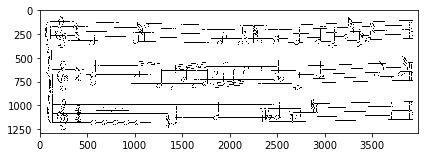

In [6]:
io.imshow(sheet_t)